<a href="https://colab.research.google.com/github/david-moravec/projects/blob/develop/deeplearningwithpython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow
from tensorflow import keras
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [28]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [29]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [30]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 210us/step - loss: 0.5556 - accuracy: 0.7395 - val_loss: 0.3179 - val_accuracy: 0.8742
Epoch 2/20
15000/15000 [==============================] - 3s 192us/step - loss: 0.2743 - accuracy: 0.8959 - val_loss: 0.3076 - val_accuracy: 0.8795
Epoch 3/20
15000/15000 [==============================] - 3s 189us/step - loss: 0.1946 - accuracy: 0.9279 - val_loss: 0.3651 - val_accuracy: 0.8685
Epoch 4/20
15000/15000 [==============================] - 3s 198us/step - loss: 0.1431 - accuracy: 0.9490 - val_loss: 0.4017 - val_accuracy: 0.8819
Epoch 5/20
15000/15000 [==============================] - 3s 194us/step - loss: 0.1172 - accuracy: 0.9580 - val_loss: 0.3403 - val_accuracy: 0.8865
Epoch 6/20
15000/15000 [==============================] - 3s 202us/step - loss: 0.0650 - accuracy: 0.9781 - val_loss: 0.4919 - val_accuracy: 0.8791
Epoch 7/20
15000/15000 [==============================] - 3s 1

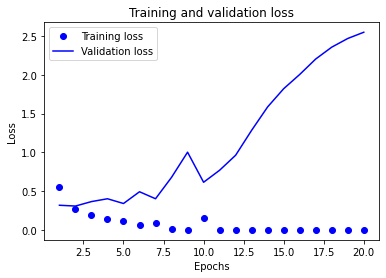

Epoch 1/4
25000/25000 [==============================] - 4s 148us/step - loss: 0.3646 - accuracy: 0.9392
Epoch 2/4
25000/25000 [==============================] - 4s 148us/step - loss: 0.1137 - accuracy: 0.9615
Epoch 3/4
25000/25000 [==============================] - 4s 151us/step - loss: 0.0522 - accuracy: 0.9831
Epoch 4/4
25000/25000 [==============================] - 3s 125us/step


In [31]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

In [32]:
model.predict(x_test)

array([[0.00989383],
       [1.        ],
       [0.9999987 ],
       ...,
       [0.02619296],
       [0.00282794],
       [0.92635787]], dtype=float32)